In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline

In [3]:
transaction_df = pd.read_excel('QVI_transaction_data.xlsx')
customer_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], unit = 'D', origin='1899-12-30')

In [9]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
transaction_df[transaction_df['PROD_QTY'] == transaction_df['PROD_QTY'].max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
transaction_df.drop(transaction_df[transaction_df['PROD_QTY'] == transaction_df['PROD_QTY'].max()].index, inplace=True)
transaction_df.reset_index(drop=True, inplace=True)

In [12]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [13]:
transaction_count = transaction_df['DATE'].value_counts()

Text(0.5, 1.0, 'Weekly Transaction Count')

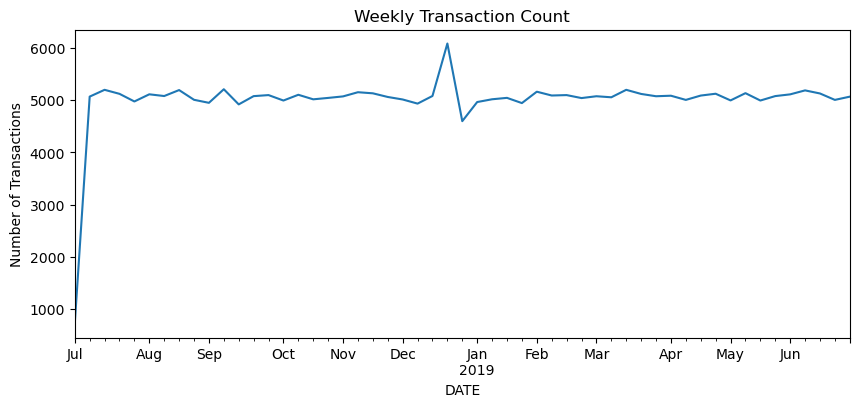

In [56]:
t_df = transaction_df.copy()
t_df = t_df.reset_index().set_index('DATE')
weekly_transactions = t_df['TXN_ID'].resample('W').count()


plt.figure(figsize=(10,4))
weekly_transactions.plot()
plt.ylabel('Number of Transactions')
plt.title('Weekly Transaction Count')

In [40]:
date_series = pd.date_range('2018-07-01', '2019-06-30', freq='D')
date_series = pd.DataFrame({'DATE':date_series})
date_series[~date_series['DATE'].isin(transaction_df['DATE'])]

,DATE
177,2018-12-25


In [15]:
plot_df = date_series.merge(transaction_count, left_on='DATE', right_index=True, how='left')
plot_df

,DATE_x,DATE_y
0,2018-07-01,724.0
1,2018-07-02,711.0
2,2018-07-03,722.0
3,2018-07-04,714.0
4,2018-07-05,712.0
...,...,...
360,2019-06-26,723.0
361,2019-06-27,709.0
362,2019-06-28,730.0
363,2019-06-29,745.0


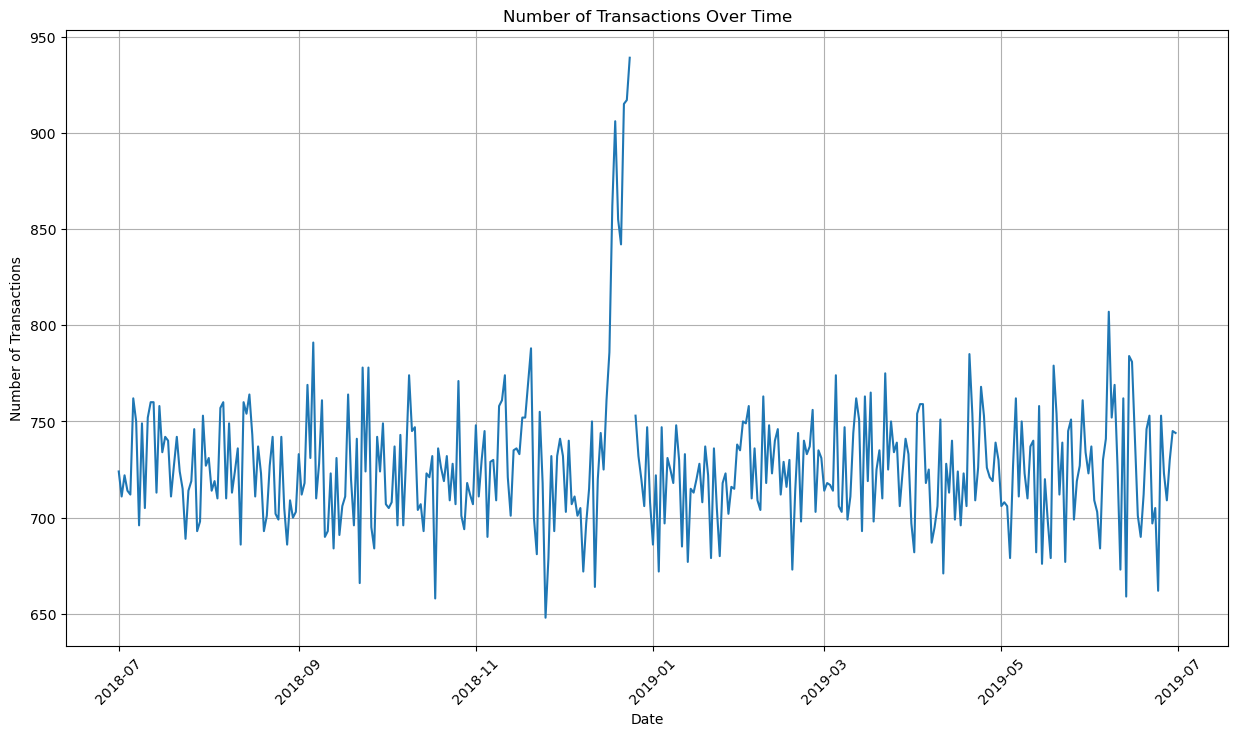

In [30]:
fig = plt.subplots(figsize=(15,8))
plt.plot(plot_df['DATE_x'], plot_df['DATE_y'])
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)

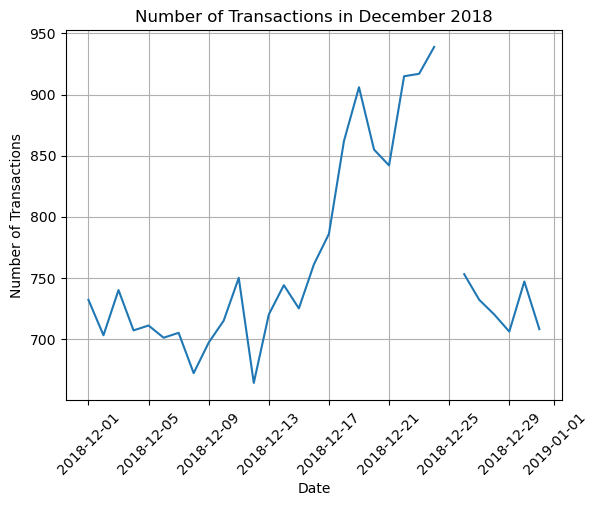

In [17]:
plt.plot(plot_df[plot_df['DATE_x'].dt.month == 12]['DATE_x'], plot_df[plot_df['DATE_x'].dt.month == 12]['DATE_y'])
plt.title('Number of Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)

In [18]:
transaction_df['PACK_SIZE'] = transaction_df['PROD_NAME'].str.extract('(\d+)')

In [19]:
transaction_df['PACK_SIZE'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

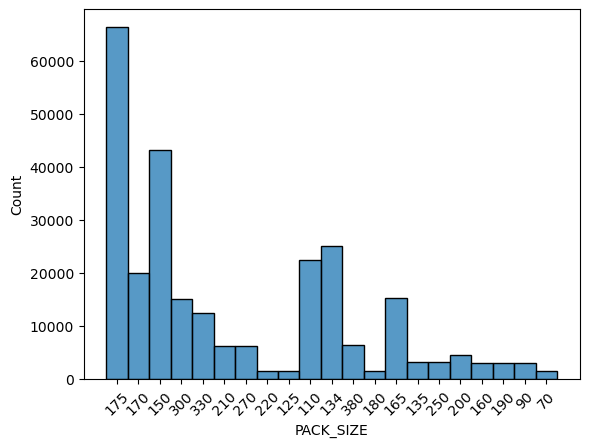

In [20]:
sns.histplot(data=transaction_df, x='PACK_SIZE')
plt.xticks(rotation=45)


In [21]:
transaction_df['BRAND']=transaction_df['PROD_NAME'].str.split().str.get(0)
brand_correction = {'Red':'RRD',
                    'Snbts':'Sunbites',
                    'Dorito':'Doritos',
                    'Grain':'GrnWves',
                    'Smith':'Smiths',
                    'NCC':'Natural',
                    'Infzns':'Infuzions',
                    'WW':'Woolworths'}

transaction_df['BRAND'] = transaction_df['BRAND'].replace(brand_correction)
transaction_df['BRAND'] = transaction_df['BRAND'].str.upper()

In [22]:
transaction_df['BRAND'].value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [23]:
customer_df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [24]:
customer_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [25]:
df = transaction_df.merge(customer_df, on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WOOLWORTHS,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget


In [26]:
df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [27]:
total_sales_segment = pd.pivot_table(df,
               values='TOT_SALES',
               index='LIFESTAGE',
               columns='PREMIUM_CUSTOMER',
               aggfunc='sum')
perc_sales = total_sales_segment/df['TOT_SALES'].sum() * 100
perc_sales

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1.837180,4.697281,3.022720
NEW FAMILIES,1.134358,0.880129,0.594434
OLDER FAMILIES,8.709428,5.351236,4.172457
OLDER SINGLES/COUPLES,7.075099,6.900459,6.841970
RETIREES,5.853133,8.053171,5.051228
YOUNG FAMILIES,7.208358,4.799960,4.346637
YOUNG SINGLES/COUPLES,3.162854,8.153762,2.154145


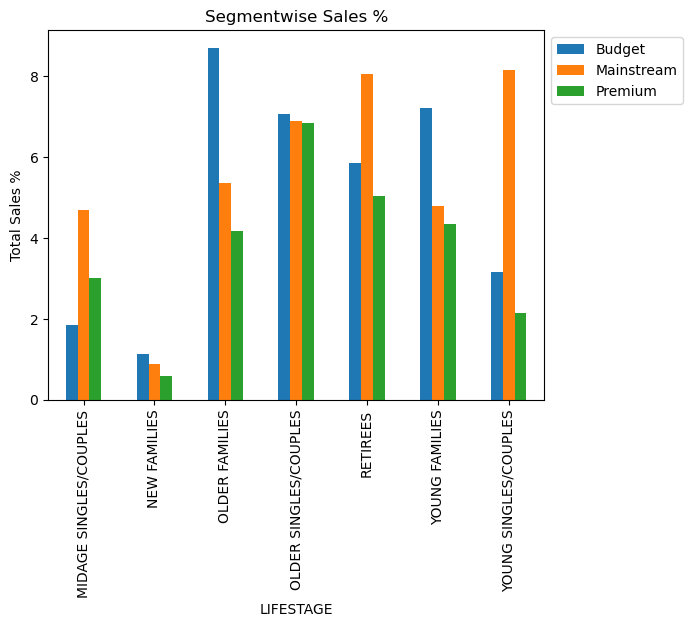

In [33]:
perc_sales.plot(kind='bar')
plt.title('Segmentwise Sales %')
plt.ylabel('Total Sales %')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

Text(0, 0.5, 'Total Customers')

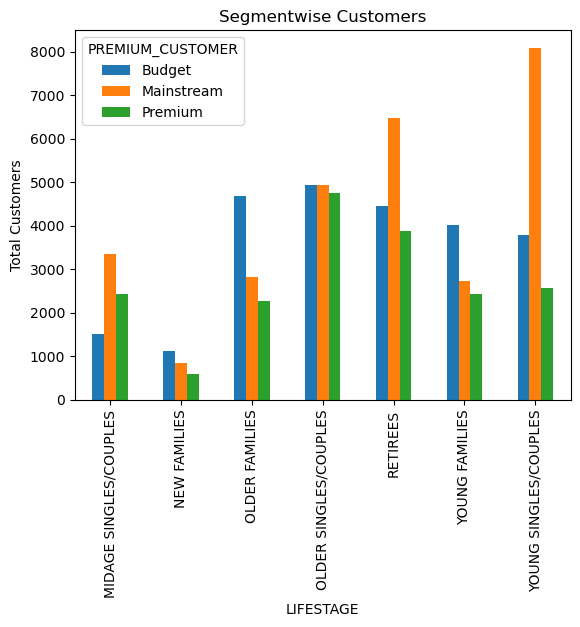

In [58]:
number_of_customers =df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index().pivot(index='LIFESTAGE',
                                                                                              columns='PREMIUM_CUSTOMER',
                                                                                              values='LYLTY_CARD_NBR')

number_of_customers.plot(kind='bar')
plt.title('Segmentwise Customers')
plt.ylabel('Total Customers')

# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

Text(0, 0.5, 'Average units of Chips')

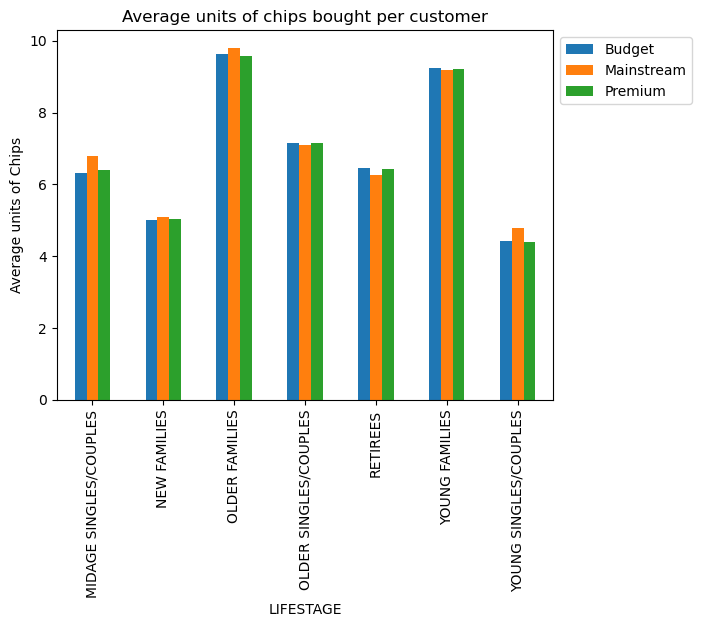

In [60]:
total_units = pd.pivot_table(df,values='PROD_QTY',
                index='LIFESTAGE',
                columns='PREMIUM_CUSTOMER',
                aggfunc='sum')
avg_units_per_customer = total_units/number_of_customers
avg_units_per_customer.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Average units of chips bought per customer')
plt.ylabel('Average units of Chips')

# Average unit price by LIFESTAGE and PREMIUM_CUSTOMER

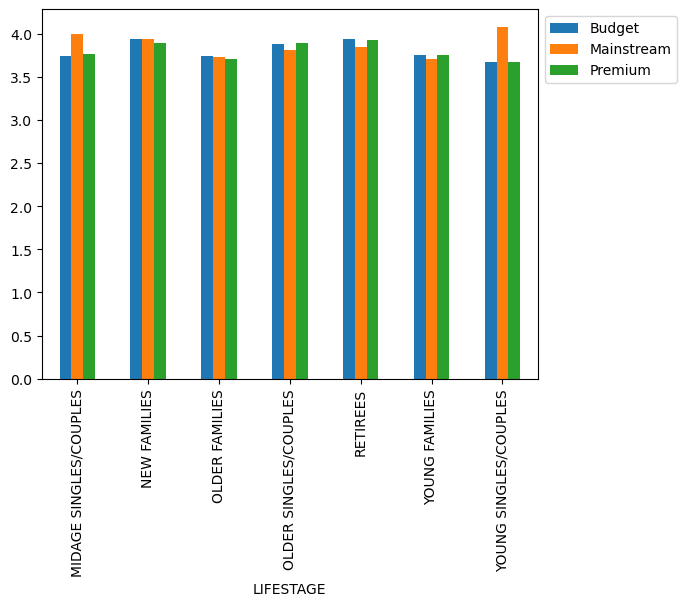

In [66]:
total_price = pd.pivot_table(df,
               values='TOT_SALES',
               index='LIFESTAGE',
               columns='PREMIUM_CUSTOMER',
               aggfunc='sum')
avg_unit_price = total_price/total_units
avg_unit_price.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [73]:
df['PRICE_PER_UNIT'] = df['TOT_SALES']/df['PROD_QTY']

In [74]:
from scipy import stats

In [75]:
t_statistic, p_value = stats.ttest_ind(df[(df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & 
                                       (df['PREMIUM_CUSTOMER'] == 'Mainstream')]['PRICE_PER_UNIT'],
                                       df[(df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & 
                                       (df['PREMIUM_CUSTOMER'] != 'Mainstream')]['PRICE_PER_UNIT'], alternative='greater')
print(t_statistic, p_value)

40.83413678791155 0.0


In [77]:
segment1 = df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]

other = df[~((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other


brand_proportions = pd.merge(quantity_segment1_by_brand[['BRAND', 'targetSegment']],
                             quantity_other_by_brand[['BRAND', 'other']],
                             on='BRAND')


brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']


brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)


         BRAND  targetSegment     other  affinityToBrand
19    TYRRELLS       0.029587  0.023933         1.236235
18    TWISTIES       0.043306  0.035283         1.227401
9       KETTLE       0.185649  0.154216         1.203823
17    TOSTITOS       0.042581  0.035377         1.203638
11         OLD       0.041598  0.034753         1.196958
12    PRINGLES       0.111980  0.093743         1.194536
5      DORITOS       0.122877  0.105277         1.167176
4         COBS       0.041856  0.036375         1.150700
8    INFUZIONS       0.060649  0.053157         1.140947
16       THINS       0.056611  0.053084         1.066445
7      GRNWVES       0.030674  0.029052         1.055825
3     CHEEZELS       0.016851  0.017370         0.970141
14      SMITHS       0.093420  0.121714         0.767536
6       FRENCH       0.003702  0.005364         0.690113
2      CHEETOS       0.007533  0.011240         0.670145
13         RRD       0.045377  0.068426         0.663149
10     NATURAL       0.018379  

In [80]:
segment1 = df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]

other = df[~((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / quantity_segment1

quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other


pack_proportions = pd.merge(quantity_segment1_by_pack[['PACK_SIZE', 'targetSegment']],
                             quantity_other_by_pack[['PACK_SIZE', 'other']],
                             on='PACK_SIZE')


pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']


pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

print(pack_proportions)

   PACK_SIZE  targetSegment     other  affinityToPack
15       270       0.029846  0.023377        1.276694
18       380       0.030156  0.023832        1.265361
17       330       0.057465  0.046727        1.229814
2        134       0.111980  0.093743        1.194536
0        110       0.099658  0.083642        1.191482
12       210       0.027309  0.023401        1.167002
3        135       0.013849  0.012180        1.136997
14       250       0.013460  0.011905        1.130611
7        170       0.075740  0.075440        1.003980
16       300       0.054954  0.057263        0.959679
8        175       0.239102  0.251517        0.950641
4        150       0.155130  0.163446        0.949122
6        165       0.052185  0.058004        0.899681
10       190       0.007015  0.011590        0.605256
9        180       0.003365  0.005651        0.595459
5        160       0.006005  0.011526        0.521046
20        90       0.005954  0.011719        0.508043
1        125       0.002821 